# SONAR MINE VS ROCK PREDICTION PROJECT

**ABSTRACT**

SONAR - SOUND NAVIGATION AND RANGING .

 SONAR is a technique that uses sound propagation to navigate, measure distances (ranging), communicate with or detect objects on or under the surface of the sea.

 DATA EXPLAINATION -->



1. we need to predict where the material detected is a rock or a mine .
2. each pattern is a set of 60 members in the range 0.0-1.0
3.each no. represnts the energy within a particular frequency band, intergrated over a certain period of time.
4.it is **supervised machine learning** --as the labels are mentioned .
And it is the **binary classification** dataset .








# TYPE OF CONTENT


1.  problem forming deciding algorithims
2.  exploratory data analysis (EDA)
3.  Preprocessiong
4.  visualisation of the data
5.  applying the algorithms
6.  selection of features and targets
7.  importing model , instantiate , fit , predict
8.  picking the best parameter and best model
9.  comparing algorithims
10.  input predictive system















## **IMPORTING REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

IMPORTING THE DATASET

In [ ]:
sonar_data=pd.read_csv('/content/drive/MyDrive/colab codes/sonar data.csv', header=None)

READING THE DATASET

In [ ]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


**OBSERVATION-->**

We can see that we are not specifying the names of the attributes this time. This is because other than the class attribute (the last column), the variables do not have meaningful names. Now that we have the dataset loaded we can take a look at it. This does not show all of the columns, but we can see all of the data has the same scale. We can also see that the class attribute (60) has string values.

**EDA PRESENTATION -- EXPLORATORY DATA ANALYSIS**


* SHAPE, SIZE
* INFO() - MISSING VALUES (NAN VLAUES),  DTYPE , FLOAT, OBJECT, INT
* DESCRIBE() - DISTRIBUTION OF THE DATA
* MUTLIVARIATE DATA-

 CORR() - REALTION BETWEEN FEARTURES AND LABEL

 HIST()- DISTRIBUTION

 HEAT MAP - CORREALATION IN VISUAL FORM

 PAIRPLOT()- LOW OR HIGH CORRELATION
* STANDARDISATION OF THE DATA







In [ ]:
print("SHAPE:", sonar_data.shape)
print("SIZE:", sonar_data.size)

SHAPE: (208, 61)
SIZE: 12688


In [ ]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

## OBSERVATION

* The data has all of the attributes are numeric and that the class value has been read in as an object.

* the data has no missing values no NAN values .
* if there were missing values -   
         1. Simple Imputer Method .
         2. Categerical Data - mapping(dict) , label binarization.(0,1)
         3. Numerical Data - one hot encoder, label encoder.






**SUMMARIZE THE DISTRIBUTION  OF EACH ATTRIBUTES**

In [ ]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


TO GET COUNT OF UNIQUE VALUES

In [ ]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

GROUPING DATA ACCOURDING TO THE CATEGORICAL AND APPLYING MEAN FUNCTION TO THE CATEGERIES


In [ ]:
sonar_data.groupby(60).mean().style.background_gradient(cmap = 'rocket_r')



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,0.289581,0.301459,0.314426,0.320692,0.331182,0.380999,0.415007,0.455882,0.538062,0.617941,0.667426,0.672325,0.676701,0.689165,0.681204,0.706075,0.714754,0.712269,0.650283,0.581796,0.482378,0.428049,0.396577,0.366140,0.337553,0.318553,0.317034,0.331608,0.336365,0.305221,0.292594,0.300975,0.276883,0.248106,0.245225,0.198804,0.146917,0.110594,0.063708,0.022721,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,0.174713,0.191589,0.226249,0.268963,0.307636,0.375611,0.417100,0.448240,0.466762,0.500229,0.542270,0.569290,0.612959,0.653761,0.668809,0.692762,0.687737,0.673145,0.632680,0.579934,0.529762,0.451619,0.440841,0.445680,0.455530,0.460710,0.417330,0.348868,0.313709,0.318057,0.285428,0.252338,0.211822,0.175132,0.142312,0.116949,0.094458,0.069488,0.038449,0.017796,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


SEPERATING DATA AND LABELS

In [ ]:
x=sonar_data.drop(columns=60,axis=1)
y=sonar_data[60]
print(x)
print(y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

**MULTIVARIATE DATA ANALYSIS --**

 Multivariate Analysis is the study of multiple variables in a set of data. Variables are factors you compare to the control or unchanging component of the experiment.

In [ ]:
sonar_data.corr()

<ipython-input-265-7cfe4af73f71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sonar_data.corr()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


Correlation heatmap

In [ ]:
sonar_data.corr().style.background_gradient(cmap = 'rocket_r')

<ipython-input-266-fc170fd1b28b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sonar_data.corr().style.background_gradient(cmap = 'rocket_r')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,0.344058,0.210861,0.210722,0.256278,0.304878,0.239079,0.137845,0.041817,0.055227,0.156760,0.117663,-0.056973,-0.163426,-0.218093,-0.295683,-0.342865,-0.341703,-0.224340,-0.199099,-0.077430,-0.048370,-0.030444,-0.031939,0.031319,0.098118,0.080722,0.119565,0.209873,0.208371,0.099993,0.127313,0.213592,0.206057,0.157949,0.279968,0.319354,0.230343,0.203234,0.247560,0.269287,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,0.297065,0.194102,0.249596,0.273170,0.307599,0.261844,0.152170,0.042870,0.040911,0.102428,0.075255,-0.074157,-0.179365,-0.196469,-0.295302,-0.365749,-0.337046,-0.234386,-0.228490,-0.115301,-0.055862,-0.049683,-0.108272,-0.004247,0.115824,0.132611,0.169186,0.217494,0.186828,0.098350,0.188226,0.261345,0.186368,0.133018,0.285716,0.304247,0.255797,0.265279,0.313995,0.245868,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,0.274610,0.214807,0.258767,0.291724,0.285663,0.237017,0.201093,0.120587,0.099303,0.103117,0.063990,-0.026815,-0.073400,-0.085380,-0.214256,-0.291974,-0.263111,-0.256674,-0.290728,-0.197493,-0.106198,-0.109895,-0.170671,-0.099409,0.017053,0.053070,0.107530,0.130276,0.110499,0.074137,0.189047,0.233442,0.113920,0.071946,0.180734,0.173649,0.179528,0.234896,0.223074,0.081096,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,0.271881,0.175381,0.215754,0.286708,0.278529,0.248245,0.223203,0.194992,0.189405,0.188317,0.142271,0.036010,-0.029749,-0.102975,-0.206673,-0.291357,-0.294749,-0.256074,-0.300476,-0.236602,-0.190086,-0.169987,-0.164651,-0.083965,0.015200,0.039282,0.063486,0.089887,0.089346,0.045141,0.145241,0.144693,0.050629,-0.008407,0.087824,0.080012,0.046109,0.121065,0.133294,0.077925,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,0.231684,0.211657,0.299086,0.359062,0.318059,0.328725,0.326477,0.299266,0.340543,0.285737,0.205088,0.152897,0.073934,-0.000624,-0.067296,-0.125675,-0.169618,-0.214692,-0.283863,-0.273350,-0.214336,-0.173485,-0.200586,-0.140559,-0.086529,-0.073481,-0.064617,-0.008620,0.063408,0.061616,0.098832,0.125181,0.063706,0.031575,0.089202,0.081964,0.041419,0.084435,0.088128,0.066751,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,0.333570,0.344451,0.411107,0.396233,0.367908,0.353783,0.293190,0.235778,0.226305,0.206841,0.174768,0.123770,0.064081,0.027026,-0.043280,-0.100309,-0.129094,-0.118645,-0.156081,-0.151186,-0.054136,-0.051934,-0.144391,-0.070337,-0.028815,-0.023621,-0.064798,-0.048745,0.030599,0.081119,0.075797,0.048763,0.034380,0.048870,0.085468,0.029524,0.016640,0.067196,0.080729,0.017300,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,0.396588,0.274432,0.365391,0.409576,0.411692,0.363086,0.250024,0.208057,0.215495,0.196496,0.165827,0.063773,0.009359,0.011982,-0.057147,-0.126074,-0.179526,-0.116848,-0.129694,-0.068142,-0.096945,-0.115871,-0.127052,-0.077662,-0.015531,0.002979,-0.001376,0.065900,0.080942,0.112673,0.041071,-0.028720,-0.025727,0.061404,0.110813,0.076537,0.098925,0.155221,0.194720,0.166112,0.184152,0.144051,0.046403,0.16

PLOTTING THE HISTOGRAM TO KNOW THE DISTRIBUTION OF THE DATASET.

In [ ]:
col=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
     17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
     34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
     51, 52, 53, 54, 55, 56, 57, 58, 59]


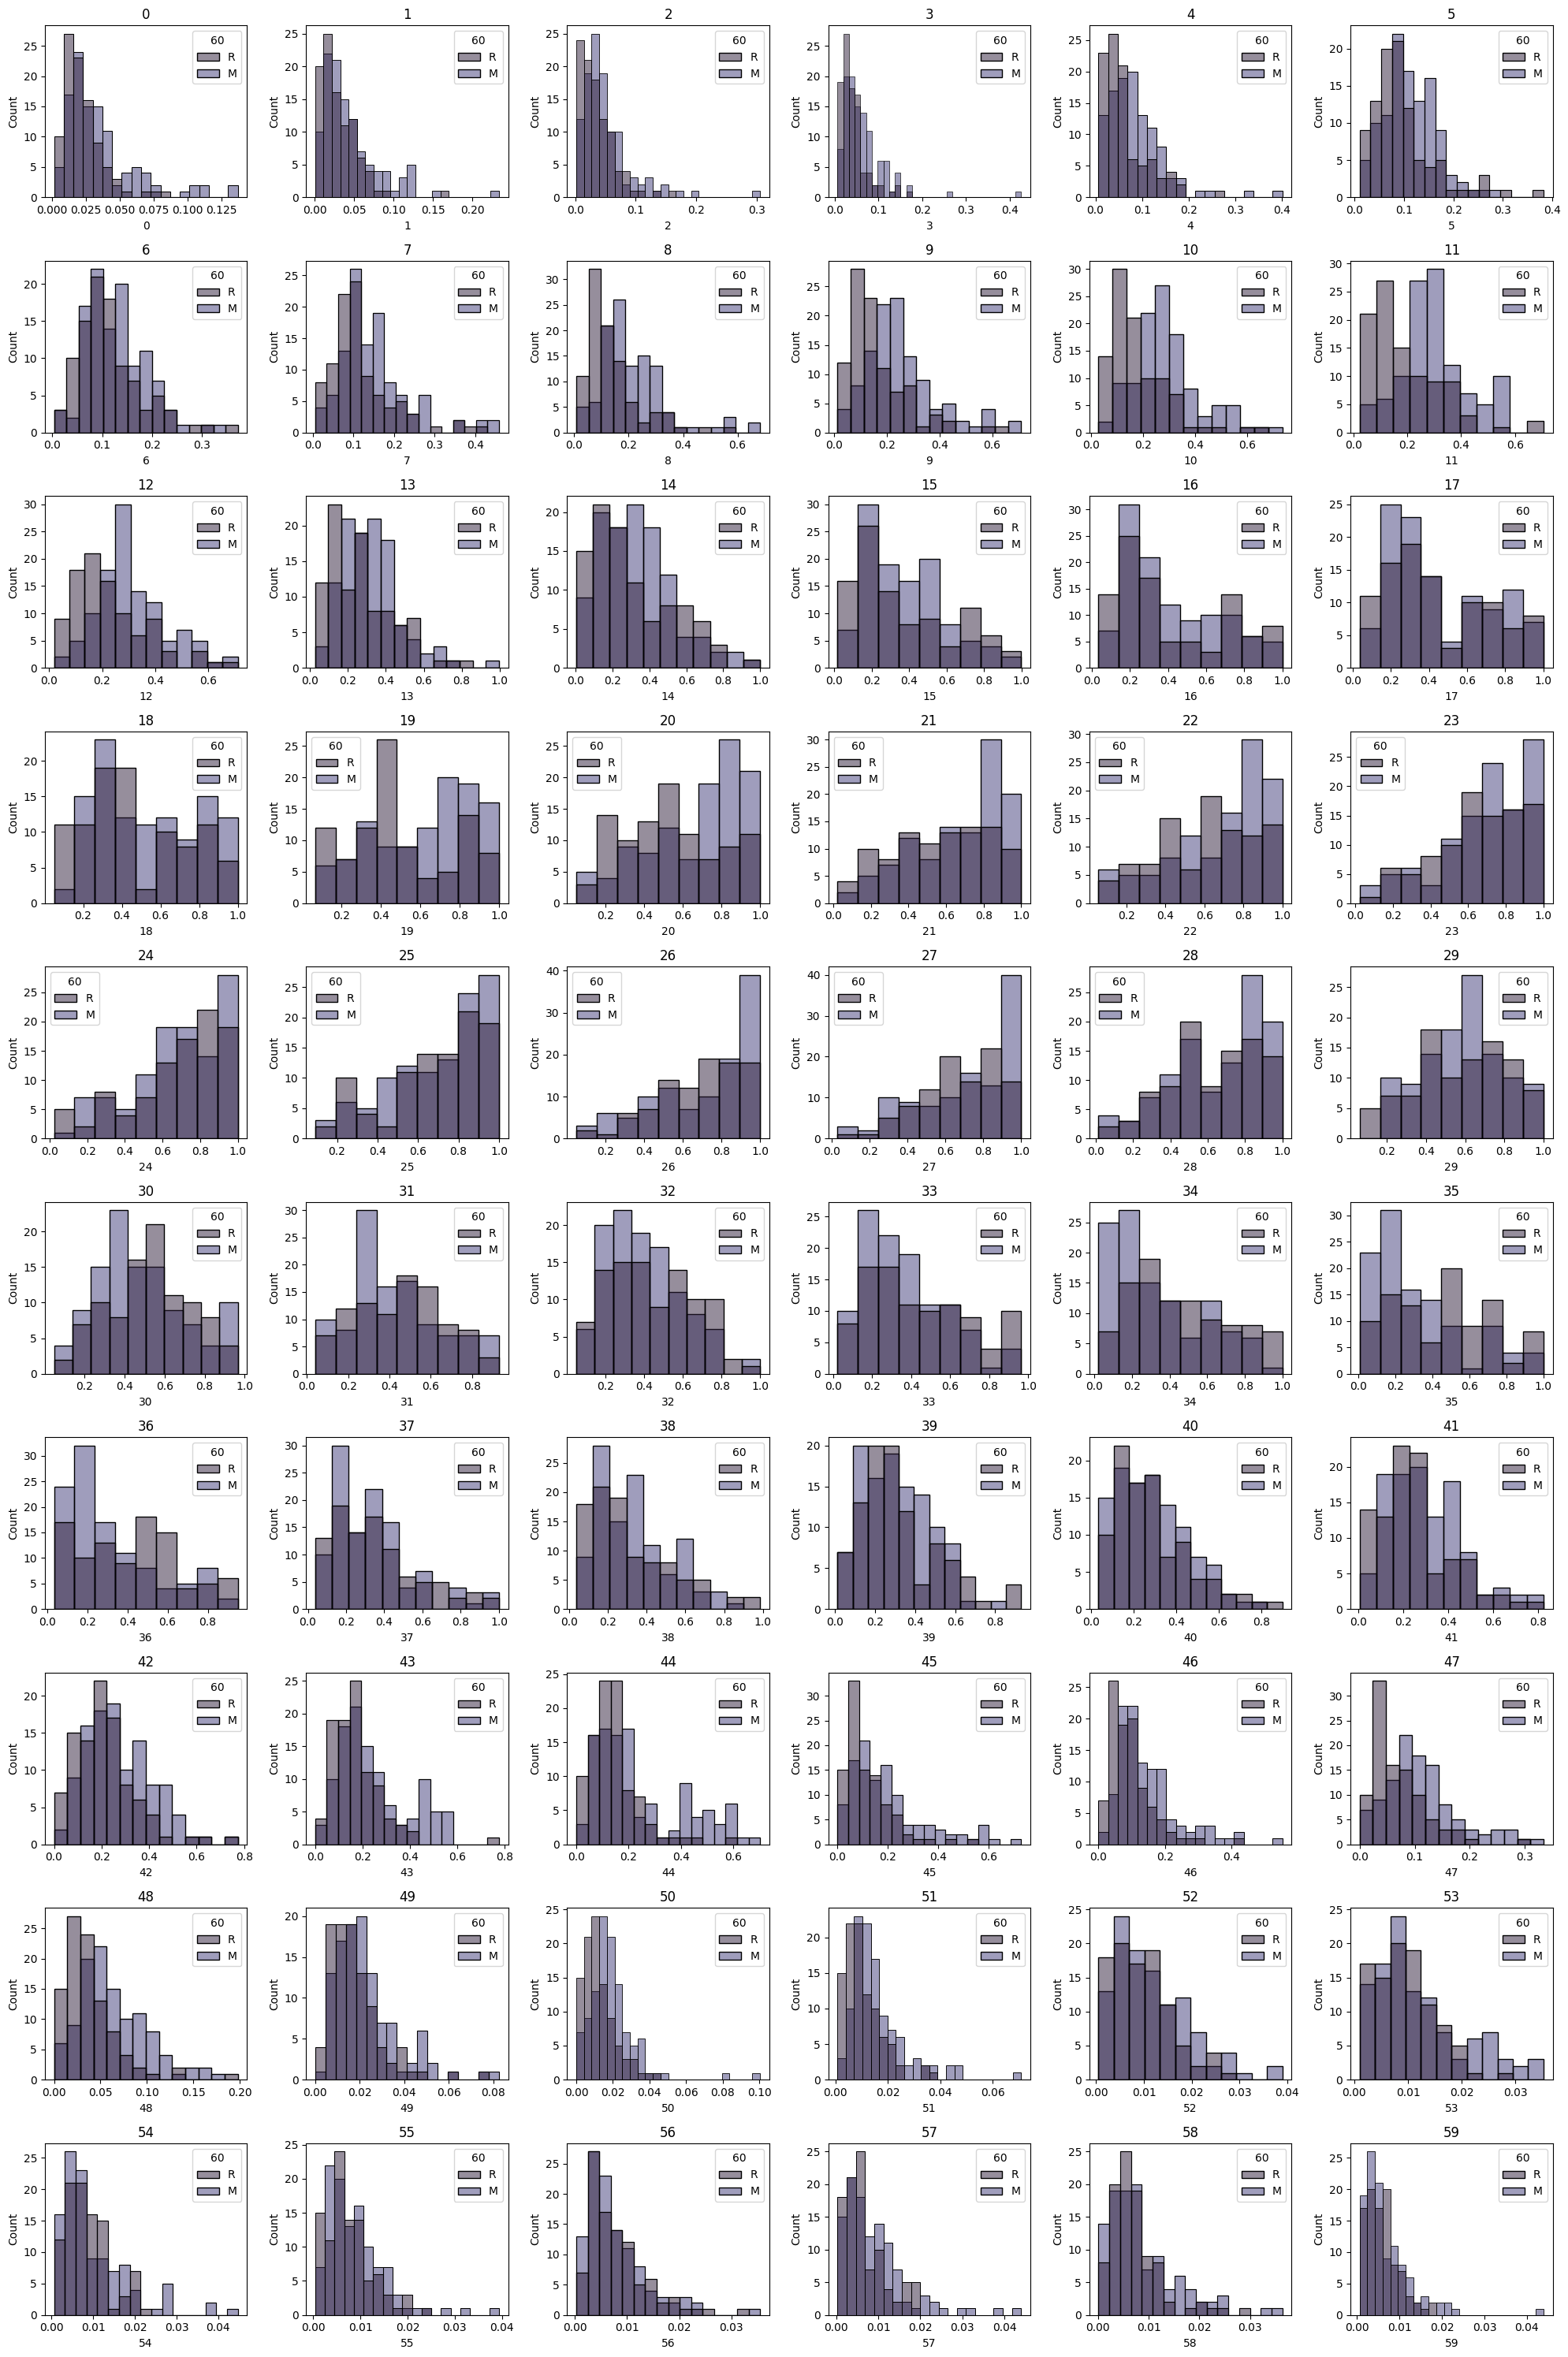

In [ ]:
fig = plt.figure(figsize=(20,30))

for i in range(len(col)):
    plt.subplot(10,6,i+1)
    plt.title(col[i])
    sns.histplot(data=sonar_data,x=sonar_data[col[i]],hue=60)

plt.tight_layout()


PLOTTING THE BAR CHART TO HAVE A GLANCE ON THE BALANCE OF THE DATASET.

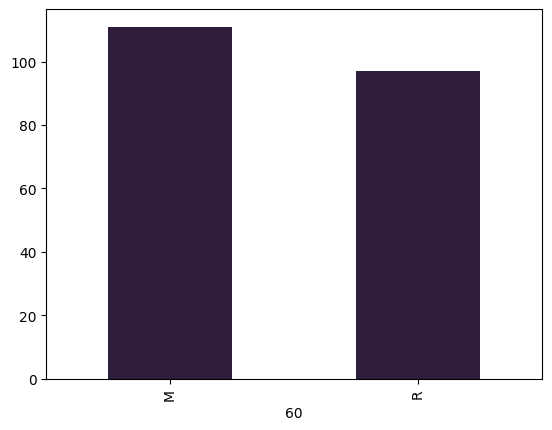

In [ ]:
sonar_data.groupby(60)[60].count().plot.bar();

# observed that there is not much difference in the both the variables , so it is quite balance for the further analysis.

# Observed that there is not much difference in the both the variables , so it is quite balance for the further analysis.

**PLOTTING THE BOXPLOT**

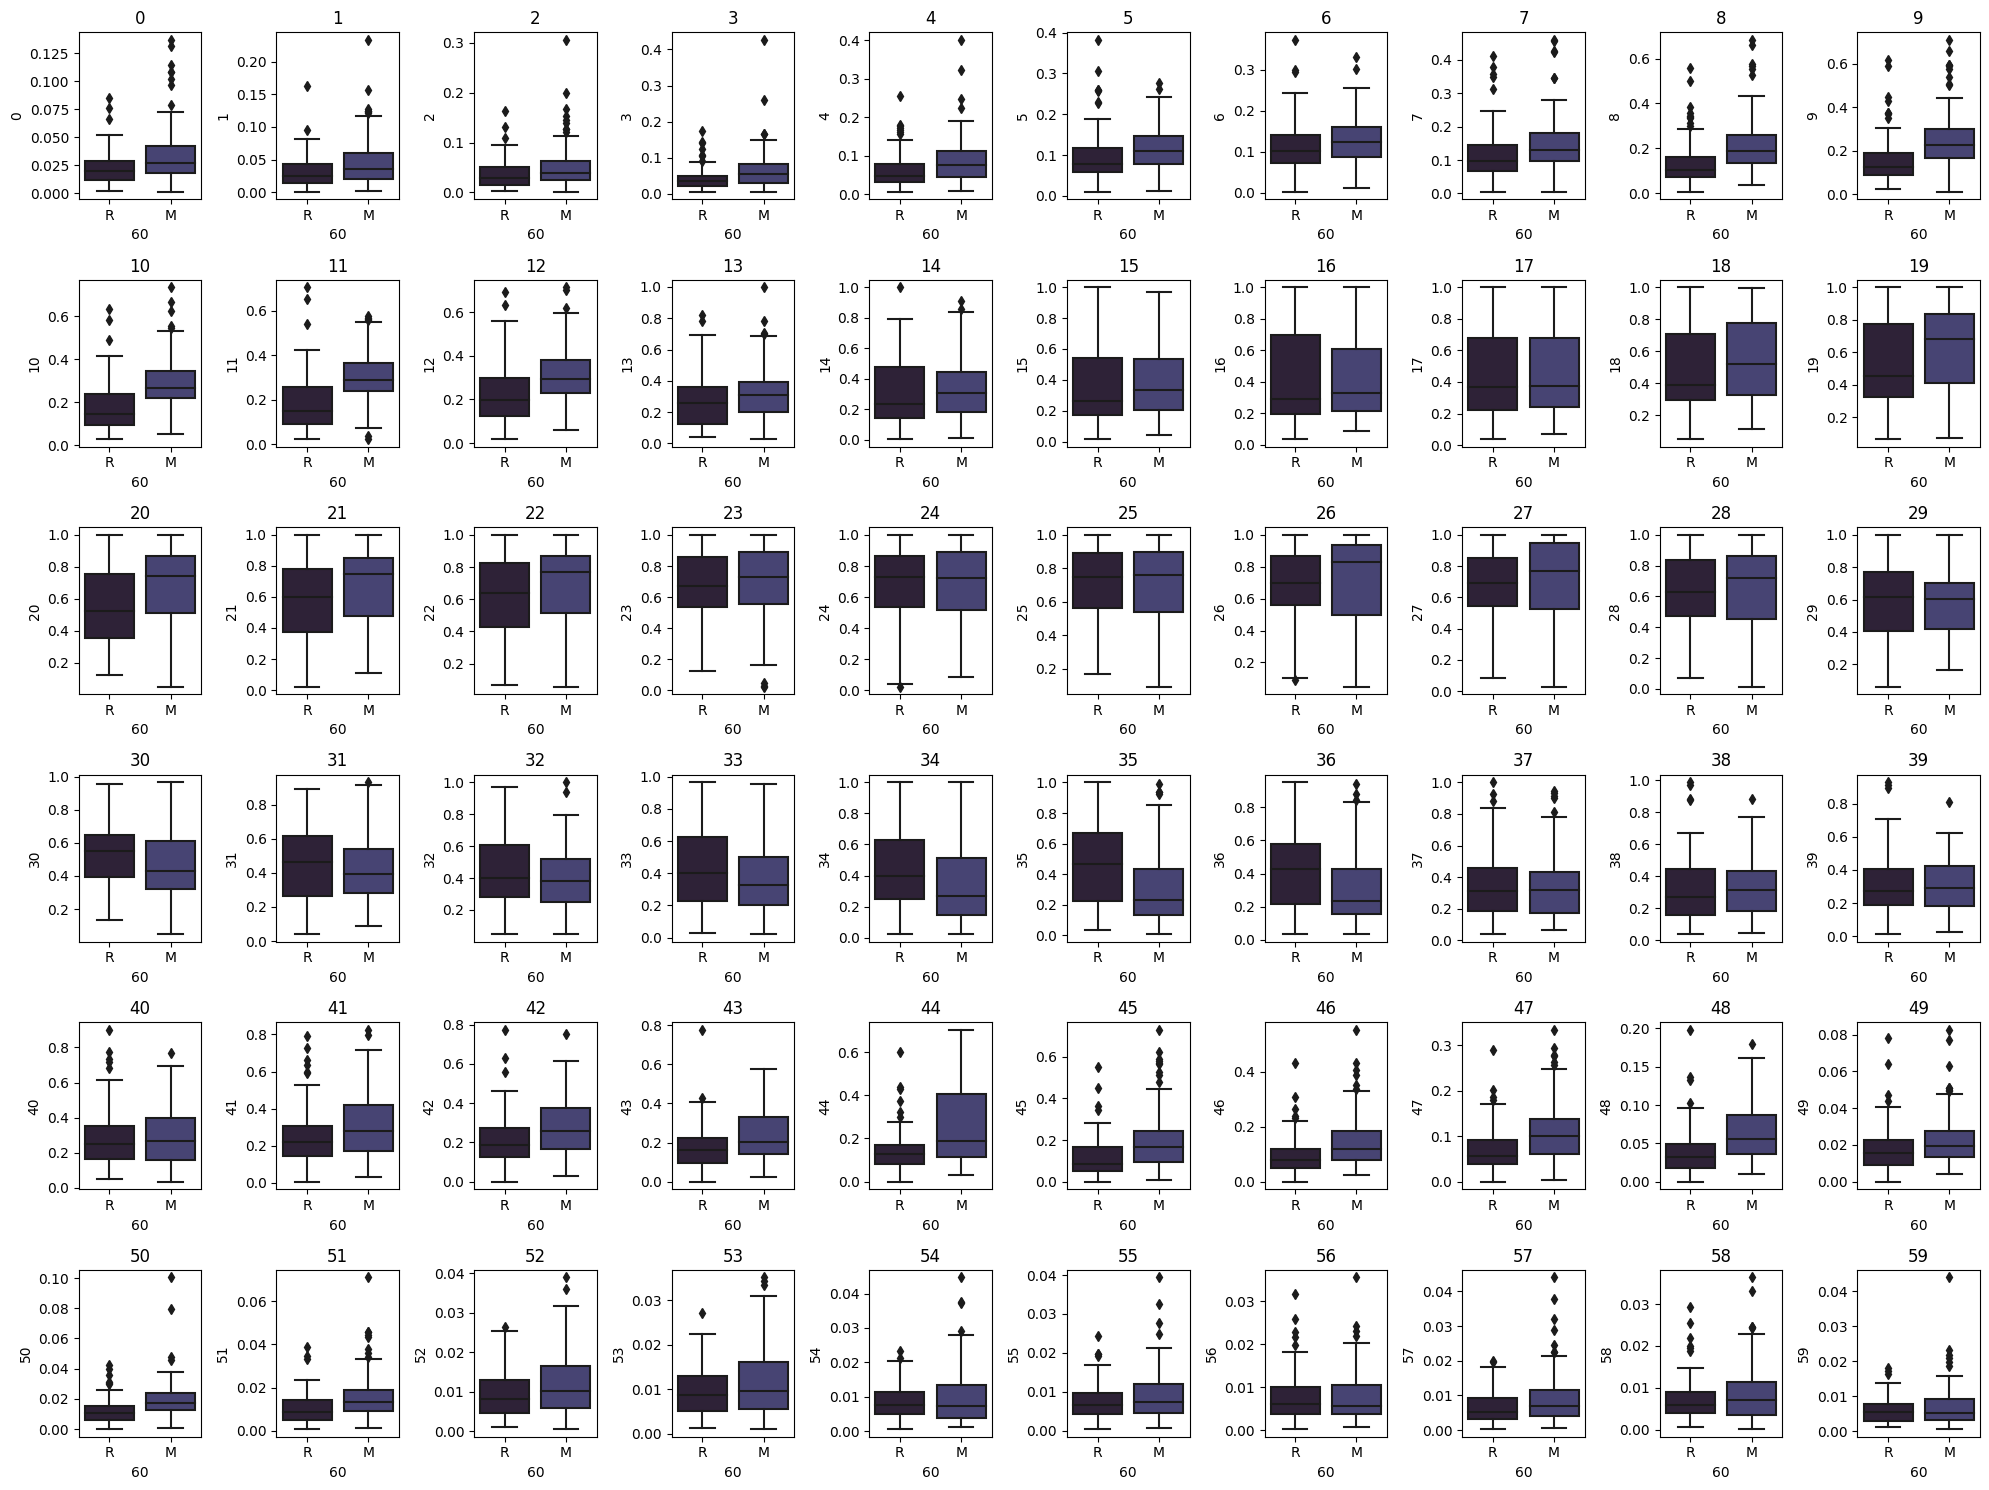

In [ ]:
fig = plt.figure(figsize=(20,15))

for i in range(len(col)):
    plt.subplot(6,10,i+1)
    plt.title(col[i])
    sns.boxplot(data=sonar_data,y=sonar_data[col[i]],x=sonar_data[60])

plt.tight_layout()
plt.show()


# NOW OUR DATA IS READY FOR MACHINE LEARNING . WE HAVE DONE PREPROSESSING AND OTHER ANALYSIS AS WELL .

**SPLIT-OUT VALIDATION DATASET**



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = sonar_data.drop( columns=60, axis=1)
y = sonar_data[60]

In [ ]:
y=pd.get_dummies(y)

In [ ]:
y.drop("R",axis=1,inplace=True)

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.15, random_state = 101)

# **IMPORTING THE LOGISTIC REGRESSION MODEL** --
It is a generalised linear model .

It is used for the binary classifaction data sets.





In [ ]:
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression(solver="liblinear",max_iter=100)

LR.fit(x_train,y_train)

y_predict=LR.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
LR.score(x_train,y_train)

0.7784090909090909

In [ ]:
LR.score(x_test,y_test)

0.75

## **OBSERVATION**
*  As the model is applied we can see the predicted socre for the test and train data sets.
*   giving 0.77 as the training score and 0.75 as the testing score.
*   so the score is not that up to mark , so we will apply another method to the dataset to get better accuracy score





# APPLYING THE CROSS VALIDATION GRID SEARCH CV

In [ ]:
# importing cross validation score from library
from sklearn.model_selection import cross_val_score

cv_score=cross_val_score(LogisticRegression(random_state = 42,max_iter=100),x, y, cv=5)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(LogisticRegression(random_state=42), {
    'C': [1,10,20],
    'solver':['sag','lbfgs']
}, cv=5, return_train_score=False)
gscv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 10, 20], 'solver': ['sag', 'lbfgs']})

In [ ]:
gscv.best_params_

{'C': 1, 'solver': 'sag'}

In [ ]:
gscv.best_estimator_

LogisticRegression(C=1, random_state=42, solver='sag')

In [ ]:
New_LR = LogisticRegression(C= 1, solver='lbfgs')
New_LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1)

In [ ]:
New_LR.score(x_train,y_train)

0.8011363636363636

In [ ]:
New_LR.score(x_test,y_test)

0.8125

## **OBSERVATION**

*   AS WE CAN SEE THE SCORE IS DEFINITLY INCREASED BUT STILL WE ARE NOT GETTING THE ABSOLUTE ACCURACY .
*  FOR THAT REASON LETS A TRY ANOTHER ALGORTIHIM TO THE DATA SET SO THAT WE WILL GET THE PROPER SCORE .



## IMPORTING DECISION TREE CLASSIFIER --


---

*  DECISION TREE IS THE MOST VERSATILE ML ALGORITHIM
*  BASED ON FEATURES AND PLOT THE GRAPHS
*  GIVES OUTPUT IN A PICTORIAL FORMAT
*  USED IN BUSSINESS ANALYSIS





In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Create Decision Tree classifier
model = DecisionTreeClassifier(max_depth=3, random_state=0)

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score: {:.2f}'.format(accuracy))

Accuracy score: 0.75


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print performance metrics
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('ROC AUC score: {:.2f}'.format(roc_auc))
print('Confusion matrix:\n', confusion)

Accuracy score: 0.75
Precision score: 0.79
Recall score: 0.69
F1 score: 0.73
ROC AUC score: 0.75
Confusion matrix:
 [[13  3]
 [ 5 11]]


## **OBSERVATION --**

As the cart alogorithim is also not giving the better score instead the accuracy score is only 0.75 . so to improve the accuracy of decision tree let us apply the Random Forest Classifier

## **APPLYING THE RANDOM FOREST CLASSIFIER**

*  creating n no. of decision trees
*  use ensembled learning for the finest output.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the training data
rf.fit(x_train, y_train)


# Predict on the testing data
y_pred = rf.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score:", accuracy)

<ipython-input-289-0b6f4124866a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Accuracy score: 0.9375


# **OBSERVATION --**

Random Forest is giving the acccuracy score of **0.93** which is a really better score for the analyis of the data .

NOW AS RANDOM FOREST IS PERFORMING BETTER THAN ALL OTHER ALORITHIMS WE WILL CONSIDER IT FOR OUR DATA ANALSYSIS.

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=10)))


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
num_folds = 10
scoring = 'accuracy'


In [ ]:

# Custom colors
class clr:
    S = '\033[1m' + '\033[36m'
    E = '\033[0m'

FINDING THE MEAN AND STANDARD DEVIATION OF THE ALL THE 3 ALGORITHIMS

In [ ]:
# Evaluate algorithms using the test harness
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state = 1235, shuffle = True)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = 'Model %s:   mean: %f     std: %f' %(name, cv_results.mean(), cv_results.std())
    print(clr.S + msg + clr.E)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model LR:   mean: 0.743464     std: 0.088008
Model CART:   mean: 0.703922     std: 0.117522


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Model RF:   mean: 0.749673     std: 0.073252


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

## **LET US COMPARE ALL THE 3 ALGORITHIMS AND SEE WICH ONE IS GIVING HOW MUCH ACCURACY SCORE .**

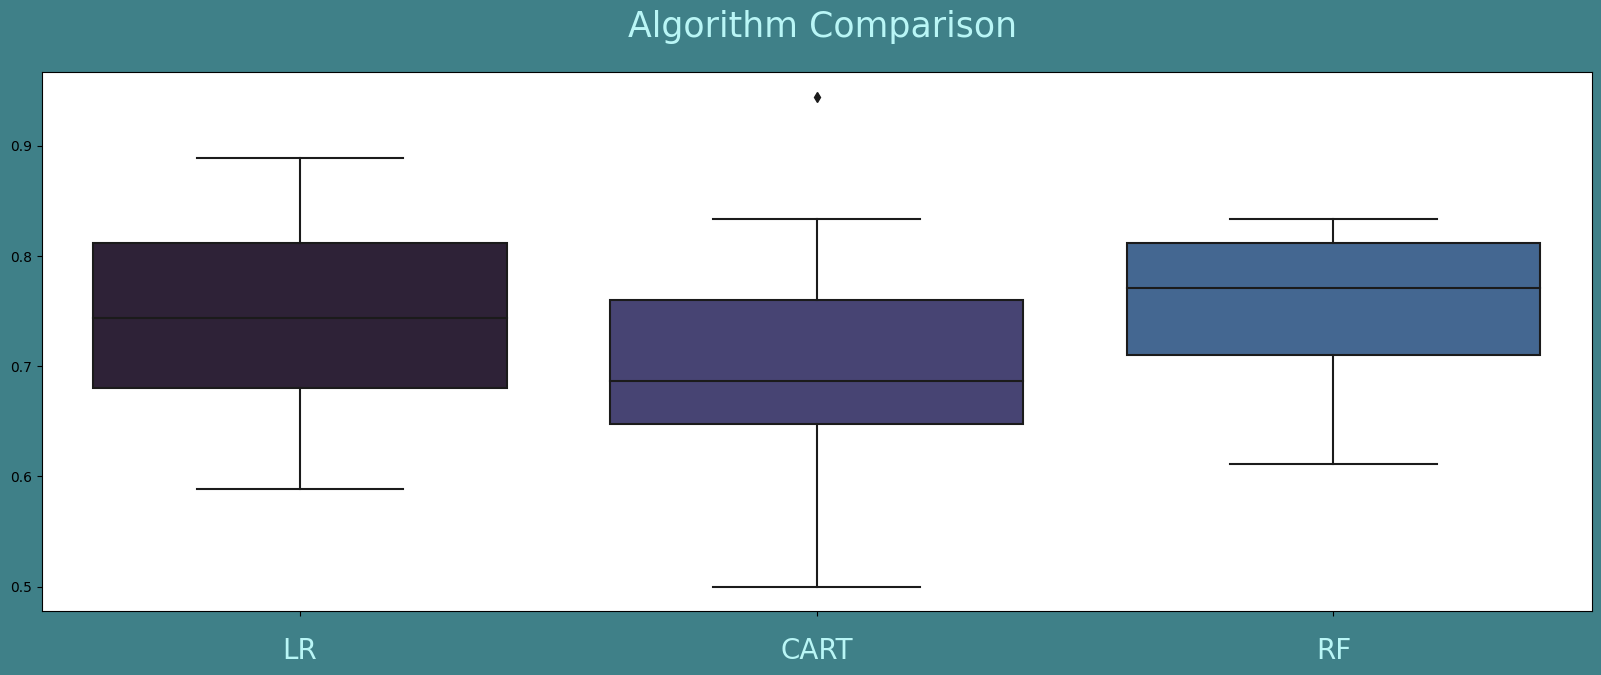

In [ ]:
# Compare Algorithms

fig = plt.figure(figsize = (20,7), facecolor = '#3f8088')
fig.suptitle
ax = fig.add_subplot(111)
sns.boxplot(data = results)
ax.set_xticklabels(names, size=20, color='#b9f6f6', y=-0.03 )
sns.set_palette('mako')
plt.title(' Algorithm Comparison', fontsize=25, color = '#b9f6f6', y=1.05)
plt.show()

# **OBSERVATION**

The results suggest **RF** may be worthy of further study, with a strong accurary value and a spread that skews up towards high 90s (%) in accuracy.

## SO NOW AS WE HAVE GET THE BEST ALGORITHIM TO FIT IN LET US CHECK THIS ACCURACY ON THE INPUT DATA BY CREATING A INPUT MODEL

In [ ]:
input_data=(0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582
            ,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,
            0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,
            0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,
            0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)

## PREDICTIVE SYSTEM IS READY

IF THE INPUT DATA GIVES THE OTUPUT AS
                                     
                                      [0] - IT IS THE ROCK

                                      [1] - IT IS THE MINE

In [ ]:
# Changing the input_data to a numpy array

input_data_as_numpy_array=np.asarray(input_data)

#Reshape the np array as we are predicting for one instance

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=rf.predict(input_data_reshaped)
print(prediction)

[0]


In [ ]:
if (prediction==[0]):
  print("The object is a Rock")
else:
  print("The object is a Mine")

The object is a Rock


## **CONCLUSION**

*  as the data was binary classification data we used **LOGISTIC REGRESSION** .
*  all the algorithims including LOGISTIC REGRESSION, DECISION TREE  performed well but **RANDOM FOREST**  gave the best accuaracy score of 0.93
*  it will be very usefull model to detect the rock and mine as it will play an import role in the **Indian Navy** in the war zones




